## Using Geopandas for National Weather Service to plot Watch/Warnings shapefiles

Import necessary libraries

In [1]:
import geopandas as gpd
import requests
import zipfile
import io
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np

Use command line argument `curl` to grab the latest shapefile

In [ ]:
! curl -L http://tgftp.nws.noaa.gov/SL.us008001/DF.sha/DC.cap/DS.WWA/current_all.tar.gz > current_all.tar.gz
! tar xvzf current_all.tar.gz

In [2]:
#dbf, prj, shp, shx = [filename for filename in filenames]
shp =  "current_all.shp"
"""
 current_all.shp
x current_all.shx
x current_all.dbf
x current_all.cpg
x current_all.prj
"""
NWS = gpd.read_file(shp)
print("Shape of the dataframe: {}".format(NWS.shape))
print("Projection of dataframe: {}".format(NWS.crs))
NWS

Shape of the dataframe: (1220, 11)
Projection of dataframe: {'init': 'epsg:4326'}


,EXPIRATION,SIG,WFO,MSG_TYPE,PHENOM,URL,PROD_TYPE,ISSUANCE,WARNID,EVENT,geometry
0,2020-01-22T16:30:00+00:00,W,KPAH,FLS,FL,https://alerts-v2.weather.gov/products/NWS-IDP...,Flood Warning,2020-01-13T15:25:00+00:00,O.EXT.KPAH.FL.W.0009.1578929100,0009,"POLYGON ((-87.70000 38.42000, -87.47000 38.430..."
1,None,W,KJAX,FLS,FL,https://alerts-v2.weather.gov/products/NWS-IDP...,Flood Warning,2020-01-13T15:24:00+00:00,O.CON.KJAX.FL.W.0016.1578929040,0016,"POLYGON ((-82.43000 32.00000, -82.13000 31.930..."
2,None,W,KCHS,FLS,FL,https://alerts-v2.weather.gov/products/NWS-IDP...,Flood Warning,2020-01-13T15:22:00+00:00,O.CON.KCHS.FL.W.0017.1578928920,0017,"POLYGON ((-82.25000 32.16000, -82.17000 32.170..."
3,2020-01-15T08:24:00+00:00,W,KEAX,FLS,FL,https://alerts-v2.weather.gov/products/NWS-IDP...,Flood Warning,2020-01-13T15:22:00+00:00,O.EXT.KEAX.FL.W.0002.1578928920,0002,"POLYGON ((-93.42000 38.94000, -93.48000 38.990..."
4,None,W,KMPX,FLW,FL,https://alerts-v2.weather.gov/products/NWS-IDP...,Flood Warning,2020-01-13T15:18:00+00:00,O.NEW.KMPX.FL.W.0001.1578928680,0001,"POLYGON ((-93.57000 45.25000, -93.51000 45.270..."
...,...,...,...,...,...,...,...,...,...,...,...
1215,None,None,None,ESF,None,https://alerts-v2.weather.gov/products/NWS-IDP...,Hydrologic Outlook,2020-01-06T21:17:00+00:00,None,None,"POLYGON ((-85.86380 40.56501, -85.86400 40.561..."
1216,None,None,None,ESF,None,https://alerts-v2.weather.gov/products/NWS-IDP...,Hydrologic Outlook,2020-01-06T21:17:00+00:00,None,None,"POLYGON ((-87.09039 39.95321, -87.09109 39.945..."
1217,None,None,None,ESF,None,https://alerts-v2.weather.gov/products/NWS-IDP...,Hydrologic Outlook,2020-01-06T21:17:00+00:00,None,None,"POLYGON ((-86.68310 38.68721, -86.68300 38.666..."
1218,None,None,None,ESF,None,https://alerts-v2.weather.gov/products/NWS-IDP...,Hydrologic Outlook,2020-01-06T21:17:00+00:00,None,None,"POLYGON ((-85.29800 39.52561, -85.29870 39.523..."


In [5]:
len(NWS.PROD_TYPE.unique())

28

In [7]:
gdf = gpd.GeoDataFrame(NWS)

In [ ]:
gdf.plot()

In [8]:
NWS = NWS[NWS.geometry.notnull()]
NWS = NWS.to_crs(epsg=3857)


/Users/chowdahead/anaconda3/envs/test4gdal/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [11]:
import matplotlib as mpl

In [13]:
cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
#cmaplist[0] = (.5, .5, .5, 1.0)

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0, 28, 28)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

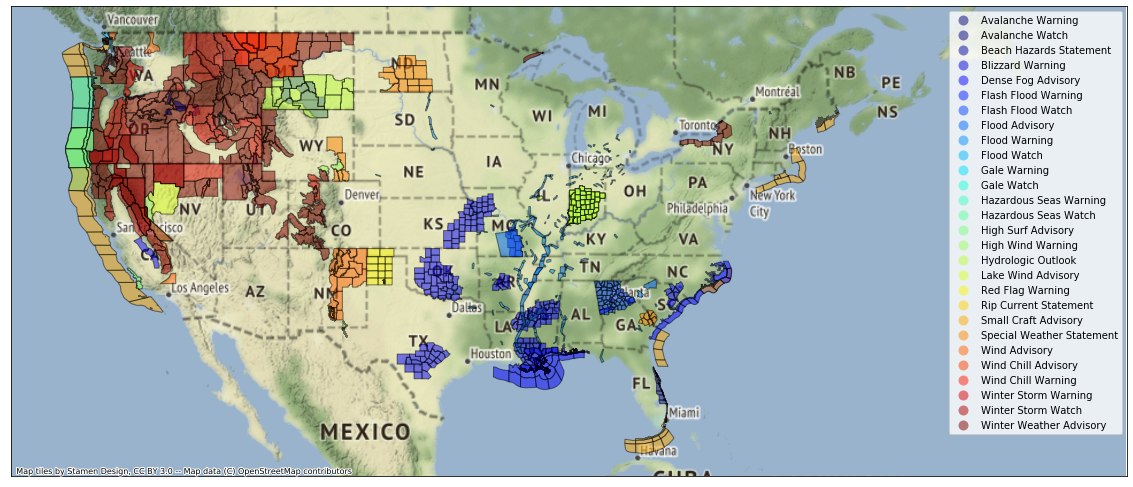

In [16]:
ax = NWS.plot(figsize=(20, 20), alpha=0.5, edgecolor='k',column="PROD_TYPE",cmap=cmap,norm=norm,
                legend=True)


ctx.add_basemap(ax)
ax.set_xlim(-14500000, -5000000)
ax.set_ylim(2500000, 6500000)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
#plt.savefig("US_Warning_geopandas_2020_01_13.png",bbox_inches="tight")